# STA 220 Assignment 3

Due __Februrary 23, 2024__ by __11:59pm__. Submit your work by uploading it to Gradescope through Canvas.

Instructions:

1. Provide your solutions in new cells following each exercise description. Create as many new cells as necessary. Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
2. The use of assistive tools is permitted, but must be indicated. You will be graded on you proficiency in coding. Produce high quality code by adhering to proper programming principles. 
3. Export the .jpynb as .pdf and submit it on Gradescope in time. To facilitate grading, indicate the area of the solution on the submission. Submissions without indication will be marked down. No late submissions accepted. 
4. If test cases are given, your solution must be in the same format. 
5. The total number of points is 10. 

__(a, i)__ Write a function that retrieves all links to movies in the database by scraping the _alphabetical_ section on [imsdb.com](https://imsdb.com/) and retrieve the links. _How many links did you find?_ __(ii)__ Write a function `fetch_script` that, given the link of a movie retrieved in (i), returns a dictionary that contains all relevant information of the movie: 

```python
fetch_script('/Movie Scripts/10 Things I Hate About You Script.html')

>>> {'title': '10 Things I Hate About You',
     'writers': ['Karen McCullah Lutz', 'Kirsten Smith', 'William Shakespeare'],
     'genres': ['Comedy', 'Romance'],
     'date': 1997,
     'script': '...'}
```

The `script` field contains a string of the scraped script. Retrieve the information for all movies. _How many scripts did you retrieve?_

In [11]:
from bs4 import BeautifulSoup
import requests
import re
import pickle

In [12]:
#Created a genre list
list_genre = str.split("Action Adventure Animation Comedy Crime Drama Family Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Short Thriller War Western")
#This is the base url
url = "https://imsdb.com/"
#Defined a function that extracts all the movies from the ABC.. urls
def movie_url_extraction(url):
    #Create a movie title list This is our output
    movie_title_url_list = []
    #Create a list that holds all the ABC urls
    url_list = []
    response = requests.get(url)
    bs = BeautifulSoup(response.text)
    html_url_list = bs.body.contents[5].find('td').findAll('td')[3:30]
    #Append all the ABC urls into the url_list
    for i in range(len(html_url_list)):
        url_list.append(url + html_url_list[i].a['href'])
    #for every url in the abc list go into that url and get every movie link as well as their title
    for i in range(len(url_list)):
        url_1 = url_list[i]
        response = requests.get(url_1).text
        bs = BeautifulSoup(response)
        script_url = bs.findAll('table')[1].findAll('td', {'valign':'top'})[1].findAll('p')
        for i in range(len(script_url)):
            tuple = (script_url[i].find('a').text, url + script_url[i].find('a')['href'])
            #Append a tuple that has the title and the url link
            movie_title_url_list.append(tuple)
    return movie_title_url_list    

In [13]:
#Save the urls into a list called x (I ran out of variable ideas at this point)
x = movie_url_extraction(url)
print("The number of movies in the website is " len(x))

1221

In [14]:
#Create a function that will get a url the tuple created above and return a dictionary that has the name, genre, write, and date, and script
def fetch_script(url_tuple):
    url_name = url_tuple[1]
    script_dict = {}
    response = requests.get(url_name).text
    bs2 = BeautifulSoup(response)
    script_detail = bs2.find('table', {'class':"script-details"})
    detail = script_detail.findAll('a')
    genre = []
    writer = []
    #TITLE
    script_dict['Title'] = url_tuple[0]
    #DATE EXTRACTION
    SDate = script_detail.find('b', string='Script Date')
    if SDate:
        SDate = SDate.next.next
        SDate = str(SDate)
        SDate = SDate.replace(":", "")
        SDate = SDate.lstrip()
        script_dict['ScriptDate'] = SDate
    else:
        script_dict['ScriptDate'] = None

    mrdate = script_detail.find('b', string='Movie Release Date')
    if mrdate:
        mrdate = mrdate.next.next
        mrdate = str(mrdate)
        mrdate = mrdate.replace(":", "")
        mrdate = mrdate.lstrip()
        script_dict['Movie Release Date'] = mrdate
    else:
        script_dict['Movie Release Date'] = None
    #WRITER GENRE
    for i in range(len(detail)-1):
        a = detail[i].text
        if a in list_genre:
            genre.append(a)
        else:
            writer.append(a)
    script_dict['Genre'] = genre
    script_dict['Writer'] = writer
    url_script = url + detail[-1]['href']
    bsscript = BeautifulSoup(requests.get(url_script).text)
    if bsscript.find('pre'):
        script_dict['Script'] = bsscript.find('pre').text
    else:
        script_dict['Script'] = None
        print(url_tuple[0])
    return script_dict

In [15]:
#Get the romance, horror, and musical genre url
romance_url = "https://imsdb.com/genre/Romance"
horror_url = "https://imsdb.com/genre/Horror"
musical_url = "https://imsdb.com/genre/Musical"

#Create a list that has each genre in it
three_genre = [romance_url, horror_url, musical_url]
#Create empty set that we can append the titles into
romance = set()
horror = set()
musical = set()

#Extract the title and put it into each of these sets based on it's respective genre
for i, url in enumerate(three_genre):
    response = requests.get(url).text
    bs = BeautifulSoup(response)
    b = bs.findAll('table')[1].findAll('p')
    for j in range(len(b)):
        title = b[j].a.text
        if i == 0:
            romance.add(title)
        elif i == 1:
            horror.add(title)
        else:
            musical.add(title)

        

In [16]:
#Lot of set algebra to get the number of unique intersections and movies without any intersection of genres
all_int = horror.intersection(musical, romance)
romance_horror = romance.intersection(horror)
romance_musical = romance.intersection(musical)
horror_musical = horror.intersection(musical)


num_unique_romance = len(romance) - len(romance_horror) - len(romance_musical) + len(all_int)
num_unique_horror = len(horror) - len(romance_horror) - len(horror_musical) + len(all_int)
num_unique_musical = len(musical) - len(horror_musical) - len(romance_musical) + len(all_int)
num_unique_int_ro_hor = len(romance_horror) 
num_unique_int_ro_musical = len(romance_musical)
num_unique_int_hor_musical = len(horror_musical)


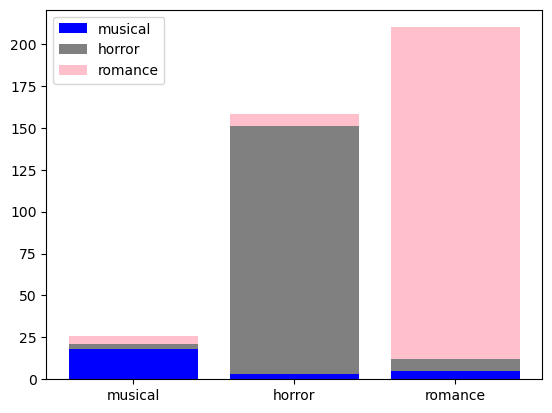

In [20]:
#Graph the number of movies in each genre and include different coloring for intersections
import matplotlib.pyplot as plt
import numpy as np
categories = ['musical', 'horror', 'romance']
values = np.array([[num_unique_musical, num_unique_int_hor_musical, num_unique_int_ro_musical],
                   [num_unique_int_hor_musical, num_unique_horror, num_unique_int_ro_hor],
                   [num_unique_int_ro_musical, num_unique_int_ro_hor, num_unique_romance]])

fig, ax = plt.subplots()
colors = ['blue', 'gray', 'pink']

bar1 = ax.bar(categories, values[0], bottom=np.sum(values[:0], axis=0), label=categories[0], color=colors[0])
bar2 = ax.bar(categories, values[1], bottom=np.sum(values[:1], axis=0), label=categories[1], color=colors[1])
bar3 = ax.bar(categories, values[2], bottom=np.sum(values[:2], axis=0), label=categories[2], color=colors[2])

ax.legend(labels=categories)

plt.show()

__(b)__ We are interested in the genres `'Musical'`, `'Horror'`, and `'Romance'`. Craft a barplot displaying the absolute counts for each of these categories. In each bar, color-code the fractions of movies that are also counted in another genres. 

__(c, i)__ Using only regex, write a function `tokenizer` that returns bigrams of all non-whitespace and non-punctuation characters, according to the test case below: 

```python
test = '''
    Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, 
    consectetur, adipisci velit, sed quia non numquam eius modi tempora 
    incidunt ut labore et dolore magnam aliquam quaerat voluptatem.
'''
tokenizer(test)
>>> ['neque porro',
 'porro quisquam',
 'quisquam est',
 'qui dolorem',
 'dolorem ipsum',
 'ipsum quia',
 'quia dolor',
 'dolor sit',
 'sit amet',
 'adipisci velit',
 'sed quia',
 'quia non',
 'non numquam',
 'numquam eius',
 'eius modi',
 'modi tempora',
 'incidunt ut',
 'ut labore',
 'labore et',
 'et dolore',
 'dolore magnam',
 'magnam aliquam',
 'aliquam quaerat',
 'quaerat voluptatem']
 ```

In [198]:
#Test string
test = '''
    Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, 
    consectetur, adipisci velit, sed quia non numquam eius modi tempora 
    incidunt ut labore et dolore magnam aliquam quaerat voluptatem.
'''
import string

import re

def tokenize_bigram(text):
    #Use regex to remove white space and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    #Lower Case all words
    text = text.lower()
    #Split text into words
    words = text.split()
    
    #Generate bigrams
    bigrams = [' '.join(words[i:i+2]) for i in range(len(words)-1)]
    
    return bigrams

tokenized_bigram = tokenize_bigram(test)
print(tokenized_bigram)

['neque porro', 'porro quisquam', 'quisquam est', 'est qui', 'qui dolorem', 'dolorem ipsum', 'ipsum quia', 'quia dolor', 'dolor sit', 'sit amet', 'amet consectetur', 'consectetur adipisci', 'adipisci velit', 'velit sed', 'sed quia', 'quia non', 'non numquam', 'numquam eius', 'eius modi', 'modi tempora', 'tempora incidunt', 'incidunt ut', 'ut labore', 'labore et', 'et dolore', 'dolore magnam', 'magnam aliquam', 'aliquam quaerat', 'quaerat voluptatem']


__(ii)__ Use the tokenizer to obtain a tf-idf vector for each movie. Perform a (non-centered) principal component analysis (`sklearn.decomposition.TruncatedSVD`). _What fraction of variation is explained by the first principal component?_ __(iii)__ Generate a strip-plot for the first principal components versus all three genres. Does visualization indicate that a good classification could result from this approach? 

In [24]:
#Extract only a list of urls from the tuple created before
urls = map(lambda y: y[1], x)
urls = list(urls)


1221

In [46]:
#With the base url I created a smaller function that will only extract the scripts from the url
base = "https://imsdb.com/"
script_list = []
def script_extraction(url):
    response = requests.get(url).text
    bs = BeautifulSoup(response)
    script_detail = bs.find('table', {'class':"script-details"})
    detail = script_detail.findAll('a')
    script_url = base + detail[-1]['href']
    response = requests.get(script_url).text
    bs = BeautifulSoup(response)
    #Check if a specific tag exists, if it doesn't then return none
    if bs.find('pre'):
        return bs.find('pre').text
    else:
        return None

In [53]:
#Used threading to create a list of scrips
import concurrent.futures
def threaded_script_extraction(script_list, url_list):
    with concurrent.futures.ThreadPoolExecutor(max_workers = 16) as executor:
        for result in executor.map(script_extraction, url_list):
            script_list.append(result)

In [67]:
#Use the threaded function
threaded_script_extraction(script_list, urls[1195:])

In [ ]:
#Save script list into a pickle file for easier access in case I have to work more
#import pickle
#with open("../Data/scripts.pkl", "ab") as f:
#    pickle.dump(script_list, f)

In [84]:
#Create a list of tokenized words
tokenized_script = []
for i, script in enumerate(script_list):
    tokenized_script.append(tokenize_bigram(script))

In [99]:
#Create a set that has both the title and the tokenized script
title_token = []
for i in range(len(x)):
    title_token.append((x[i][0], tokenized_script[i]))

In [103]:
#Remove all movies that I could not extract the script from
title_token_nones = []
for x in title_token:
  if (x[1] != None):
    title_token_nones.append(x)

len(title_token_nones)

1150

In [159]:
#Use tfidfvectorizer to create the tfidf vector
from sklearn.feature_extraction.text import TfidfVectorizer
only_token_list = []
for token in title_token_nones:
    only_token_list.append(token[1])

def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  
X = vectorizer.fit_transform(only_token_list)

In [161]:
#Create a truncated SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1, algorithm='randomized',
                     random_state=42)
output = svd.fit(X)
#Calculate the explained variance and output
print("The explained variance in the first component is: ", svd.explained_variance_ratio_)

The explained variance in the first component is:  [0.00447878]


In [167]:
#Create a list that has a list of tokenized movies based on the genre tag
romance_token = []
horror_token = []
musical_token = []
for tuple in title_token_nones:
    if tuple[0] in romance:
        romance_token.append(tuple[1])
    if tuple[0] in horror:
        horror_token.append(tuple[1])
    if tuple[0] in musical:
        musical_token.append(tuple[1])
    


In [174]:
#Vectorize and output the explained variance and keep the transformed output for graphing
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  
romance_tf = vectorizer.fit_transform(romance_token)
svd = TruncatedSVD(n_components=1, algorithm='randomized',
                     random_state=42)
romance_svd = svd.fit(romance_tf)
print("The explained variance in the first component is: ", romance_svd.explained_variance_ratio_)
romance_output = svd.transform(romance_tf)

The explained variance in the first component is:  [0.00512236]


In [175]:
#Vectorize and output the explained variance and keep the transformed output for graphing
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  
horror_tf = vectorizer.fit_transform(horror_token)
svd = TruncatedSVD(n_components=1, algorithm='randomized',
                     random_state=42)
horror_svd = svd.fit(horror_tf)
print("The explained variance in the first component is: ", horror_svd.explained_variance_ratio_)
horror_output = svd.transform(horror_tf)

The explained variance in the first component is:  [0.00677619]


In [176]:
#Vectorize and output the explained variance and keep the transformed output for graphing

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  
musical_tf = vectorizer.fit_transform(musical_token)
svd = TruncatedSVD(n_components=1, algorithm='randomized',
                     random_state=42)
musical_svd = svd.fit(musical_tf)
print("The explained variance in the first component is: ", musical_svd.explained_variance_ratio_)
musical_output = svd.transform(musical_tf)

The explained variance in the first component is:  [0.00894262]


In [192]:
#Create a function that flattens the array into a single list
from itertools import chain

def flatten_chain(matrix):
     return list(chain.from_iterable(matrix))

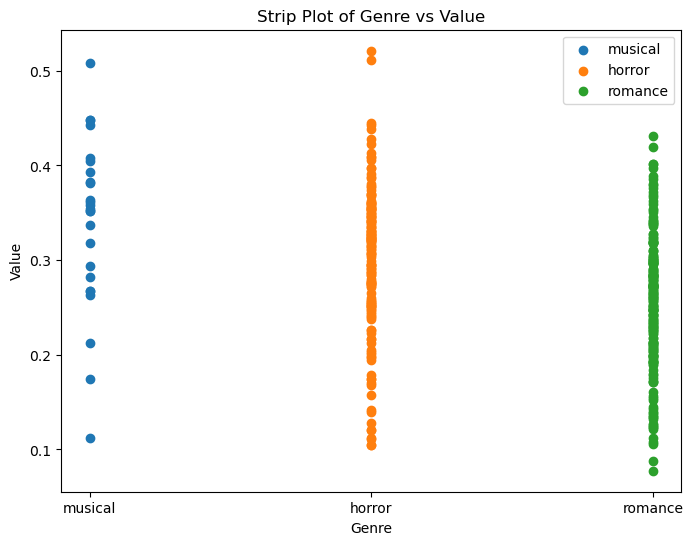

In [197]:
#Create a dictionary that has the genre tag and list of svd values
data = {
    'musical': flatten_chain(musical_output),
    'horror': flatten_chain(horror_output),
    'romance': flatten_chain(romance_output)
}
plt.figure(figsize=(8, 6))

#plot the strip plot in each genre
for genre, values in data.items():
    x = [genre] * len(values)  # Repeat genre name for each value
    plt.scatter(x, values, label=genre)

#Add labes and titles
plt.xlabel('Genre')
plt.ylabel('Value')
plt.title('Strip Plot of Genre vs Value')
plt.legend()

# Show the plot
plt.show()